In [ ]:
# PyRolL Simulation of Stands for 8.5mm Product of ESF Elbe-Stahlwerke-Feralpi-Riesa
This Notebook is used to model the first 10 Stands ar ESF Elbe-Stahlwerke Feralpi Riesa.
In the end, the results from the calculation are compared to measured values.

## Initialization and Configuration

Import the core library and the respective plugins.

In [6]:
import pathlib
import logging
import sys

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

logging.basicConfig(stream=sys.stdout, format='[%(levelname)s] %(name)s: %(message)s')
logging.getLogger("pyroll").setLevel(logging.INFO)

import pyroll.basic as pr
from pyroll.freiberg_flow_stress import FreibergFlowStressCoefficients

## Definition of the Initial Workpiece (Profile) and simulation setup


In [7]:
in_profile = pr.Profile.box(
    height=160e-3,
    width=160e-3,
    corner_radius=3e-3,
    temperature=1100 + 273.15,
    strain=0,
    material=["BST500", "steel"],
    freiberg_flow_stress_coefficients=FreibergFlowStressCoefficients(
        a=4877.12 * 1e6,
        m1=-0.00273339,
        m2=0.302309,
        m3=-0.0407581,
        m4=0.000222222,
        m5=-0.000383134,
        m6=0,
        m7=-0.492672,
        m8=0.000175044,
        m9=-0.0611783,
        baseStrain=0.1,
        baseStrainRate=0.1
    ),
    density=7.5e3,
    specific_heat_capacity=690,
    thermal_conductivity=23
)

## The Pass Sequence

The pass sequence is representing the Kocks finishing block located at the Saarstahl plant in Marktneuenkirchen

In [8]:
sequence = pr.PassSequence(
    [
        pr.RollPass(
            label="Stand A",
            orientation="h",
            roll=pr.Roll(
                groove=pr.BoxGroove(
                    usable_width=185.29e-3,
                    depth=52e-3,
                    ground_width=157.62e-3,
                    r1=15e-3,
                    r2=18e-3
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.261,
            gap=15e-3
        ),
        pr.Transport(
            label="A => B",
            length=2.5
        ),
        pr.RollPass(
            label="Stand B",
            orientation="v",
            roll=pr.Roll(
                groove=pr.BoxGroove(
                    usable_width=138.435e-3,
                    depth=55.5e-3,
                    ground_width=108.693e-3,
                    r1=22e-3,
                    r2=20e-3
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.339,
            gap=15e-3
        ),
        pr.Transport(
            label="B => 1",
            length=2.5
        ),
        pr.RollPass(
            label="Stand 1",
            orientation="h",
            roll=pr.Roll(
                groove=pr.Oval3RadiiFlankedGroove(
                    depth=41.1e-3,
                    r1=6e-3,
                    r2=23.5e-3,
                    r3=183e-3,
                    flank_angle=73,
                    usable_width=148.5e-3
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.448,
            gap=12e-3
        ),
        pr.Transport(
            label="1 => 2",
            length=2.5,
            disk_element_count=15
        ),
        pr.RollPass(
            label="Stand 2",
            orientation="v",
            roll=pr.Roll(
                groove=pr.FalseRoundGroove(
                    depth=50e-3,
                    r1=8e-3,
                    r2=55e-3,
                    flank_angle=65
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.556,
            gap=10e-3
        ),
        pr.Transport(
            label="2 => 3",
            length=2.5
        ),
        pr.RollPass(
            label="Stand 3",
            orientation="h",
            roll=pr.Roll(
                groove=pr.Oval3RadiiGroove(
                    depth=28.5e-3,
                    r1=10e-3,
                    r2=30e-3,
                    r3=170e-3,
                    usable_width=124.618e-3
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=0.768,
            gap=10e-3
        ),
        pr.Transport(
            label="3 => 4",
            length=2.4
        ),
        pr.RollPass(
            label="Stand 4",
            orientation="v",
            roll=pr.Roll(
                groove=pr.FalseRoundGroove(
                    depth=39e-3,
                    r1=6e-3,
                    r2=42.5e-3,
                    flank_angle=65
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=0.938,
            gap=8e-3
        ),
        pr.Transport(
            label="4 => 5",
            length=2.4
        ),
        pr.RollPass(
            label="Stand 5",
            orientation="h",
            roll=pr.Roll(
                groove=pr.Oval3RadiiGroove(
                    depth=24.5e-3,
                    r1=8e-3,
                    r2=34e-3,
                    r3=81.5e-3,
                    usable_width=97.3375e-3
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=1.238,
            gap=8e-3
        ),
        pr.Transport(
            label="5 => 6",
            length=2.4
        ),
        pr.RollPass(
            label="Stand 6",
            orientation="v",
            roll=pr.Roll(
                groove=pr.FalseRoundGroove(
                    depth=30e-3,
                    r1=6e-3,
                    r2=33e-3,
                    flank_angle=65
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=1.526,
            gap=6e-3
        ),
        pr.Transport(
            label="6 => 7",
            length=5.5
        ),
        pr.RollPass(
            label="Stand 7",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOvalGroove(
                    depth=17.5e-3,
                    r1=7e-3,
                    r2=60e-3
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=2.06,
            gap=7e-3
        ),
        pr.Transport(
            label="7 => 8",
            length=4.2
        ),
        pr.RollPass(
            label="Stand 8",
            orientation="v",
            roll=pr.Roll(
                groove=pr.FalseRoundGroove(
                    depth=22.75e-3,
                    r1=4.5e-3,
                    r2=25.75e-3,
                    flank_angle=65
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=2.52,
            gap=6e-3
        ),
        pr.Transport(
            label="8 => 9",
            length=4.2
        ),
        pr.RollPass(
            label="Stand 9",
            orientation="h",
            roll=pr.Roll(
                groove=pr.Oval3RadiiGroove(
                    depth=12e-3,
                    r1=5e-3,
                    r2=8.8e-3,
                    r3=71e-3,
                    usable_width=69.03e-3
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=3.45,
            gap=5e-3,            
        ),
        pr.Transport(
            label="9 => 10",
            length=4.2
        ),
        pr.RollPass(
            label="Stand 10",
            orientation="v",
            roll=pr.Roll(
                groove=pr.FalseRoundGroove(
                    depth=17.25e-3,
                    r1=3.5e-3,
                    r2=19.25e-3,
                    flank_angle=59.99
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=4.43,
            gap=4e-3
        ),
        pr.Transport(
            label="10 => 11",
            length=4.2
        ),
        pr.RollPass(
            label="Stand 11",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOval(
                    usable_width=185.29e-3,
                    depth=9.5e-3,
                    ground_width=157.62e-3,
                    r1=5e-3,
                    r2=40e-3
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.261,
            gap=5.5e-3
        ),
        pr.Transport(
            label="11 => 12",
            length=2.5
        ),
        pr.RollPass(
            label="Stand 12",
            orientation="v",
            roll=pr.Roll(
                groove=pr.Round(
                    usable_width=138.435e-3,
                    depth=13e-3,
                    ground_width=108.693e-3,
                    r1=2.5e-3,
                    r2=14e-3,
                    flank_angle=30
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.339,
            gap=5e-3
        ),
        pr.Transport(
            label="12 => 13",
            length=2.5
        ),
        pr.RollPass(
            label="Stand 13",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOval(
                    depth=7.5e-3,
                    r1=4e-3,
                    r2=31e-3,
                    usable_width=148.5e-3
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.448,
            gap=4.5e-3
        ),
        pr.Transport(
            label="13 => 14",
            length=2.5,
            disk_element_count=15
        ),
        pr.RollPass(
            label="Stand 14",
            orientation="v",
            roll=pr.Roll(
                groove=pr.RoundGroove(
                    depth=10.25e-3,
                    r1=2.5e-3,
                    r2=12e-3,
                    flank_angle=30
                ),
                nominal_radius=635e-3 / 2
            ),
            velocity=0.556,
            gap=4.5e-3
        ),
        pr.Transport(
            label="14 => 17",
            length=20.6
        ),
        pr.RollPass(
            label="Stand 17",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOval(
                    depth=7.4e-3,
                    r2=23e-3,
                    usable_width=124.618e-3
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=0.768,
            gap=2.3e-3
        ),
        pr.Transport(
            label="17 => 18",
            length=0.85
        ),
        pr.RollPass(
            label="Stand 18",
            orientation="v",
            roll=pr.Roll(
                groove=pr.Round(
                    depth=8.7e-3,
                    r1=0.2e-3,
                    r2=10.3e-3
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=0.938,
            gap=2.1e-3
        ),
        pr.Transport(
            label="18 => 21",
            length=37.55
        ),
        pr.RollPass(
            label="Stand 21",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOval(
                    depth=4.5e-3,
                    r2=34e-3,
                    usable_width=97.3375e-3
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=1.238,
            gap=2.7e-3
        ),
        pr.Transport(
            label="21 => 22",
            length=0.85
        ),
        pr.RollPass(
            label="Stand 22",
            orientation="v",
            roll=pr.Roll(
                groove=pr.Round(
                    depth=6.6e-3,
                    r1=0.2e-3,
                    r2=7e-3,
                    flank_angle=30
                ),
                nominal_radius=530e-3 / 2
            ),
            velocity=1.526,
            gap=2.2e-3
        ),
        pr.Transport(
            label="22 => 23",
            length=0.85
        ),
        pr.RollPass(
            label="Stand 23",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOvalGroove(
                    depth=3.5e-3,
                    r2=15.5e-3
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=2.06,
            gap=2.4e-3
        ),
        pr.Transport(
            label="23 => 24",
            length=0.85
        ),
        pr.RollPass(
            label="Stand 24",
            orientation="v",
            roll=pr.Roll(
                groove=pr.Round(
                    depth=4.85e-3,
                    r1=0.2e-3,
                    r2=5.85e-3,
                    flank_angle=20
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=2.52,
            gap=1.7e-3
        ),
        pr.Transport(
            label="24 => 27",
            length=19
        ),
        pr.RollPass(
            label="Stand 27",
            orientation="h",
            roll=pr.Roll(
                groove=pr.CircularOval(
                    depth=2.4e-3,
                    r2=14e-3,
                    usable_width=69.03e-3
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=3.45,
            gap=1.7e-3,            
        ),
        pr.Transport(
            label="27 => 28",
            length=0.75
        ),
        pr.RollPass(
            label="Stand 28",
            orientation="v",
            roll=pr.Roll(
                groove=pr.Round(
                    depth=3.5e-3,
                    r1=0.2e-3,
                    r2=4.33e-3,
                    flank_angle=25
                ),
                nominal_radius=450e-3 / 2
            ),
            velocity=4.43,
            gap=1.7e-3
        )
    ]
)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:242                                                                                  │
│                                                                                                  │
│   239 │   │   │   label="Stand 11",                                                              │
│   240 │   │   │   orientation="h",                                                               │
│   241 │   │   │   roll=pr.Roll(                                                                  │
│ ❱ 242 │   │   │   │   groove=pr.CircularOval(                                                    │
│   243 │   │   │   │   │   usable_width=185.29e-3,                                                │
│   244 │   │   │   │   │   depth=9.5e-3,                                                          │
│   245 │   │   │   │   │   ground_width=157.62e-3,                                                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: module 'pyroll.basic' has no attribute 'CircularOval'

In [4]:
sequence.solve(in_profile)

[INFO] pyroll.core.PassSequence: Started solving of PassSequence.
[INFO] pyroll.core.RollPass: Started solving of RollPass 'Stand A'.
[INFO] pyroll.core.Rotator: Started solving of Rotator 'Auto-Rotator for RollPass 'Stand A''.
[INFO] pyroll.core.Rotator: Finished solving of Rotator 'Auto-Rotator for RollPass 'Stand A'' after 2 iterations.
[INFO] pyroll.core.Rotator: Solution took 0.005 s.
[INFO] pyroll.core.RollPass: Finished solving of RollPass 'Stand A' after 5 iterations.
[INFO] pyroll.core.RollPass: Solution took 0.052 s.
[INFO] pyroll.core.Transport: Started solving of Transport 'A => B'.
[INFO] pyroll.core.Transport: Finished solving of Transport 'A => B' after 2 iterations.
[INFO] pyroll.core.Transport: Solution took 0.005 s.
[INFO] pyroll.core.RollPass: Started solving of RollPass 'Stand B'.
[INFO] pyroll.core.Rotator: Started solving of Rotator 'Auto-Rotator for RollPass 'Stand B''.
[INFO] pyroll.core.Rotator: Finished solving of Rotator 'Auto-Rotator for RollPass 'Stand B'' 

Profile(
    classifiers={'false_round', 'generic_elongation', 'round'},
    cross_section=Polygon(
        area=0.0012606730408368022,
        height=0.0405,
        perimeter=0.12639169710867557,
        width=0.03943780581915157,
        ),
    density=7500.0,
    freiberg_flow_stress_coefficients=FreibergFlowStressCoefficients(a=4877120000.0, m1=-0.00273339, m2=0.302309, m3=-0.0407581, m4=0.000222222, m5=-0.000383134, m6=0, m7=-0.492672, m8=0.000175044, m9=-0.0611783, baseStrain=0.1, baseStrainRate=0.1),
    length=0.0,
    material=['BST500', 'steel'],
    specific_heat_capacity=690,
    strain=0.4338164788588835,
    t=44.681895429088556,
    temperature=1383.9520344305847,
    thermal_conductivity=23,
    )

# Analysis of the results
At last a report can be generated using the pyroll-report package.


In [5]:
from pyroll.report import report

rendered = report(sequence)
file = "report_esf_stand_10.html"
file_path = pathlib.Path.cwd() / file
file_path.write_text(rendered, encoding='utf-8')

2605717

## Characteristic Forming values
Let's further focus on the characteristic forming values, and investigate different effects.
The important values are the combination of strain, strain-rate, draughts and temperature.

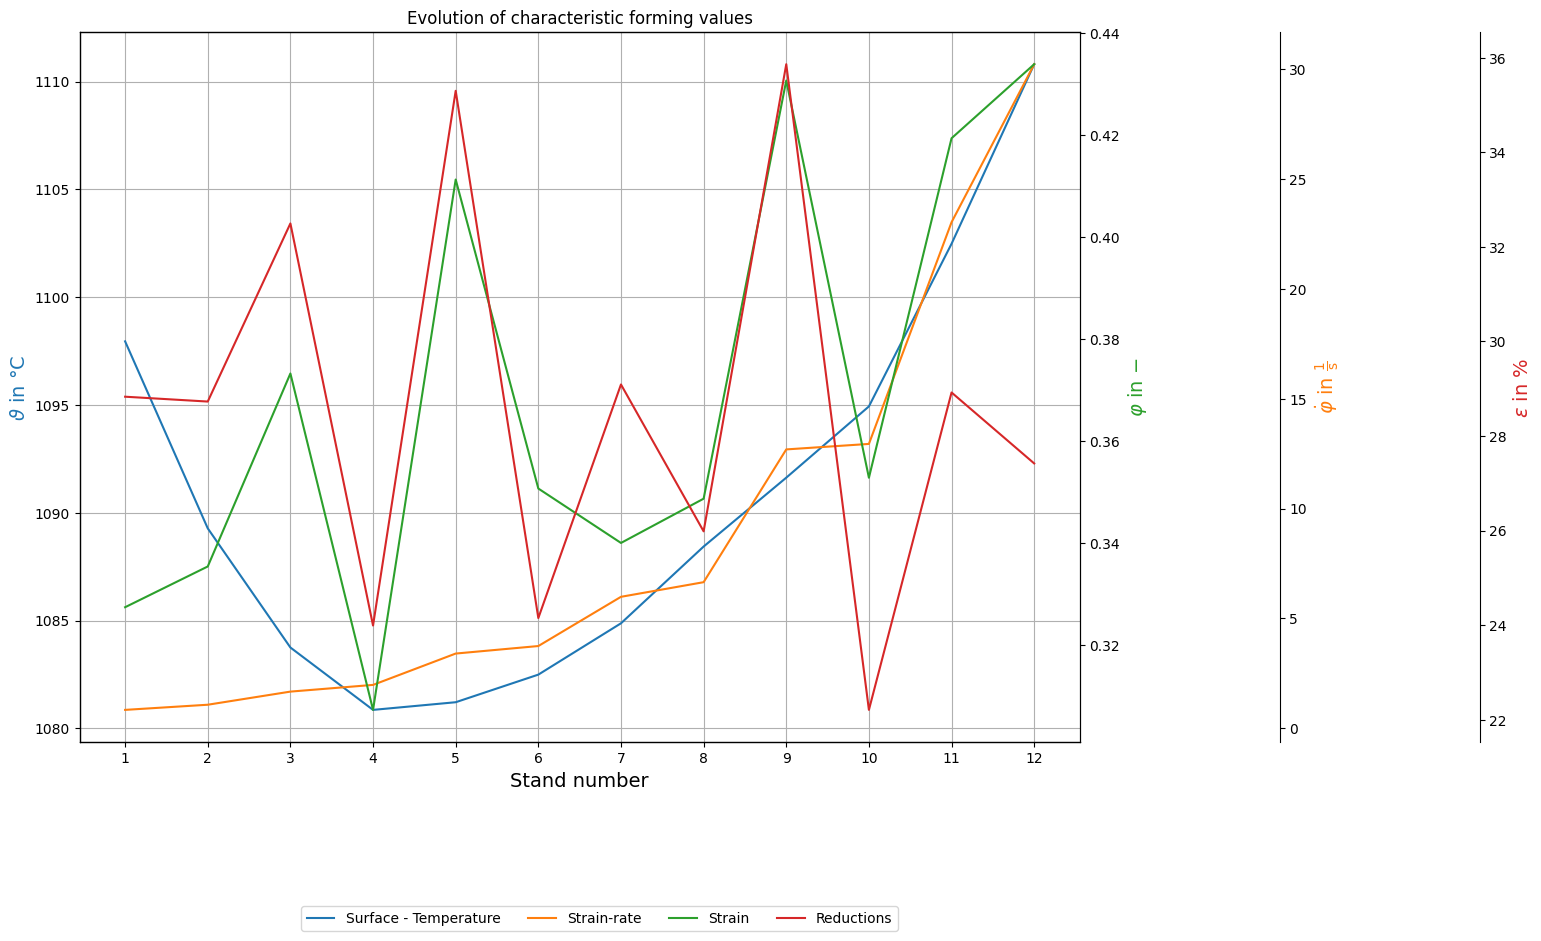

In [6]:
roll_passes = [unit for unit in sequence if isinstance(unit, pr.RollPass)]
stand_numbers = range(1, len(roll_passes) + 1, 1)
strains = []
strain_rates = []
temperatures = []
reductions = []

for rp in roll_passes:
    strains.append(rp.strain)
    strain_rates.append(rp.strain_rate)
    temperatures.append(rp.out_profile.surface_temperature - 273.15)
    reductions.append((rp.elongation - 1) * 100)

fig = plt.figure(figsize=(16, 12))
grid = fig.add_gridspec(3, 1, height_ratios=[1, 0.3, 0.001])
ax = fig.add_subplot(grid[0])
fig.subplots_adjust(hspace=0, right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin1.spines.right.set_position(("axes", 1.2))
twin3.spines.right.set_position(("axes", 1.4))

ax.set_title(r"Evolution of characteristic forming values")
ax.set_xlabel(r"Stand number", fontsize=14)
ax.set_ylabel(r"$\dot{\varphi}$ in $\mathrm{\frac{1}{s}}$", fontsize=14)
ax.grid(True)

p1, = ax.plot(stand_numbers, temperatures, color='C0', label="Temperature")
p2, = twin1.plot(stand_numbers, strain_rates, color='C1', label="Strain-rate")
p3, = twin2.plot(stand_numbers, strains, color='C2', label="Strain")
p4, = twin3.plot(stand_numbers, reductions, color='C3', label="Reductions")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())

ax.set_ylabel(r"$\vartheta$ in $\mathrm{°C}$", fontsize=14, color='C0')
twin1.set_ylabel(r"$\dot{\varphi}$ in $\mathrm{\frac{1}{s}}$", fontsize=14, color='C1')
twin2.set_ylabel(r"$\varphi$ in $\mathrm{-}$", fontsize=14, color='C2')
twin3.set_ylabel(r"$\epsilon$ in $\mathrm{\%}$", fontsize=14, color='C3')
ax.set_xticks(stand_numbers)

_handles = [
    plt.Line2D([], [], color='C0', label='Surface - Temperature'),
    plt.Line2D([], [], color='C1', label='Strain-rate'),
    plt.Line2D([], [], color='C2', label='Strain'),
    plt.Line2D([], [], color='C3', label='Reductions')
]

fig.legend(handles=_handles, loc="lower center", bbox_to_anchor=(0.45, 0.125), ncol=4, frameon=True)

plt.show()

In [28]:
seperation_point_x = roll_passes[11].out_profile.width / 2
seperation_point_y = roll_passes[11].roll.groove.contour_line.interpolate(seperation_point_x)
seperation_point_x, seperation_point_y.y

(0.019718902909575786, 0.008334526654874375)